The reflectance values of atmospherically corrected bands must be in the range of 0-1 but this will not be the exact case after applying atmospheric correction also ,so we need to perform normalization. We will see how to perform normalization in this example

In [ ]:
#import the library (Assuming the library is already installed )
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#define normalization function
def normalization(atm_corrected_band):
    min_val = np.min(atm_corrected_band)
    max_val = np.max(atm_corrected_band)
    normalized_image = (atm_corrected_band - min_val) / (max_val - min_val)
    normalized_image = np.clip(normalized_image, 0, 1)  # ensure values to [0, 1]
    return normalized_image



In [ ]:
# read the image band(For example band 2-blue band of landsat 8)
atm_corrected_band_path = '/content/output_raster/b5_dos.tif'
with rasterio.open(atm_corrected_band_path) as src:
    atm_corrected_band = src.read(1)

    # Convert to numpy array and ensure data type
    corrected_image = np.array(atm_corrected_band, dtype=np.float64)  # Convert to float64 for precision

    # Check for NaN values
    if np.isnan(corrected_image).any():
      print("Warning: NaN values detected in the image data.")

    # Print data type and range of the image
    print("Before Normalization")
    print("Data type:", corrected_image.dtype)
    print("Min value:", corrected_image.min())
    print("Max value:", corrected_image.max())


    #call normalization  function
    normalized_band = normalization(atm_corrected_band)

    print("After Normalization")
    print("Data type:", normalized_band.dtype)
    print("Min value:", normalized_band.min())
    print("Max value:", normalized_band.max())



Before Normalization
Data type: float64
Min value: -0.14660731054710938
Max value: 1.4186016583159395
After Normalization
Data type: float64
Min value: 0.0
Max value: 1.0


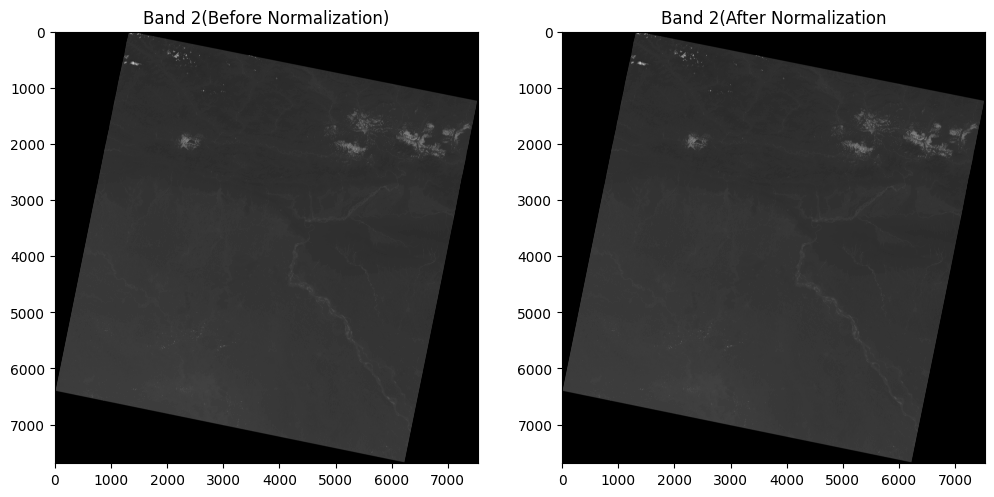

In [ ]:

# Display both non-normalized and normalized bands side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(corrected_image, cmap='gray')
axes[0].set_title('Band 2(Before Normalization)')

axes[1].imshow(atm_corrected_band, cmap='gray')
axes[1].set_title('Band 2(After Normalization')
plt.savefig('Normalization')
plt.show()

In [ ]:
#save the corrected band to a new file
output_path = '/content/output_raster/b5_norm.tif'
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=atm_corrected_band.shape[0],
    width=atm_corrected_band.shape[1],
    count=1,
    dtype=atm_corrected_band.dtype,
    crs=src.crs,
    transform=src.transform,
) as dst:
    dst.write(atm_corrected_band, 1)
